In [1]:
import pandas as pd
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
src_folder = os.path.join(project_root, 'src')
sys.path.insert(0, src_folder)

from plot import *

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
df_occurrences = pd.read_csv("../../data/interm_intro/occurrences.csv", sep = '~')
df_upd_occurrences = df_occurrences.copy()
print "Number of occurrences:", df_occurrences.shape[0]

Number of occurrences: 5460


# The classification output

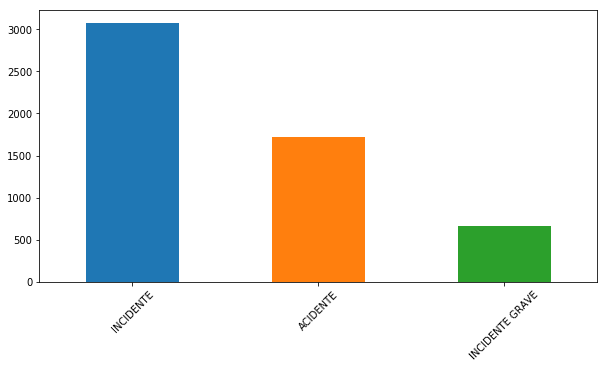

In [4]:
occur_class_serie = df_occurrences['ocorrencia_classificacao'].value_counts()
ax = occur_class_serie.plot.bar(rot = 45)

There are __THREE__ types for a classification of the occurrence. Also, the data is clean.

# Possible features

The first feature to analyse is the type of the occurence.

In [5]:
df_occurrences['ocorrencia_tipo'].value_counts()

FALHA DO MOTOR EM VOO                                                                           651
ESTOURO DE PNEU                                                                                 599
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE                                              563
PERDA DE CONTROLE NO SOLO                                                                       463
PERDA DE CONTROLE EM VOO                                                                        345
OUTROS                                                                                          329
COLISÃO COM AVE                                                                                 319
COM TREM DE POUSO                                                                               315
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO                                               170
TRÁFEGO AÉREO                                                                                   129


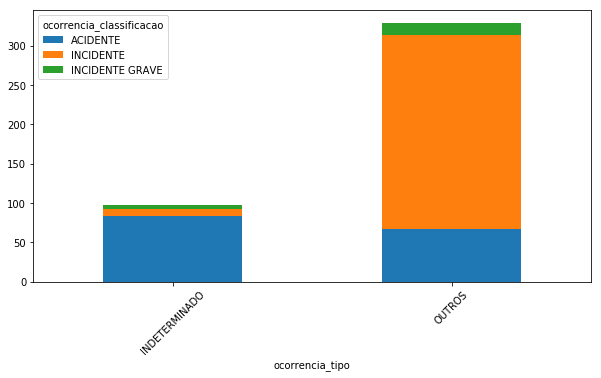

In [6]:
occur_type_df = df_occurrences[(df_occurrences.ocorrencia_tipo == 'OUTROS') | (df_occurrences.ocorrencia_tipo == 'INDETERMINADO')].groupby(['ocorrencia_tipo', 'ocorrencia_classificacao']).size().unstack()

ax = occur_type_df.plot.bar(rot = 45, stacked = True)

The data looks clean (there is no typos), the only problem is the _outros_ and _indeterminado_ values. While the former shows a distribution equivalent to the total distribution, i.e., more incidents than accident and serious incidents, the latter presents almost all occurrences as accidents.

Looking on the final reports: http://sistema.cenipa.aer.mil.br/cenipa/paginas/relatorios/relatorios.php, we can see that _indeterminado_ is often due to interruption of investigation, which is when checking the existence of evidence of crime or that it was the result of violation of any law, or that research will not bring new knowledge to the prevention of new occurrences. Thererofe, the high number of accidents can be related to these "dangerous" conditions.

For the _ocorrencia_tipo_icao_, which is a abreviated form of type, we have:

In [7]:
df_occurrences['ocorrencia_tipo_categoria'].value_counts()

FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE                                              1160
FALHA OU MAU FUNCIONAMENTO DO MOTOR                                                              751
OUTROS                                                                                           703
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE                                               563
PERDA DE CONTROLE NO SOLO                                                                        463
PERDA DE CONTROLE EM VOO                                                                         345
COLISÃO COM AVE                                                                                  319
CONTATO ANORMAL COM A PISTA                                                                      176
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO                                                170
COLISÃO NO SOLO                                                                            

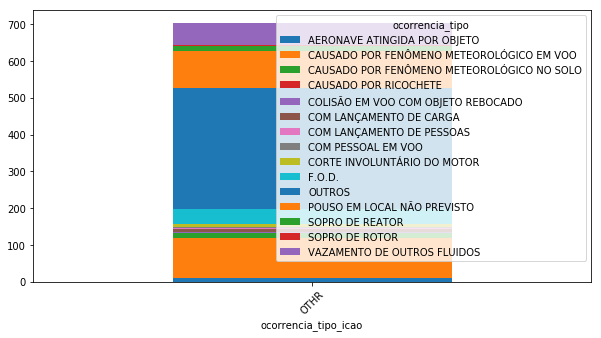

In [8]:
occur_uf_df = df_occurrences[(df_occurrences.ocorrencia_tipo_icao == 'OTHR')].groupby(['ocorrencia_tipo_icao', 'ocorrencia_tipo']).size().unstack()

ax = occur_uf_df.plot.bar(rot = 45, stacked = True)

Considering the three columns above that are about __type__ of occurrence, _ocorrencia_tipo_ is the most detailed in comparison to the others two. We can see it by looking the _others_ value, which is the smallest counting in this column. So we will drop the others and keep it.

In [9]:
df_upd_occurrences = df_upd_occurrences.drop(['ocorrencia_tipo_categoria', 'ocorrencia_tipo_icao'], axis = 1)
df_upd_occurrences.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
1,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2019-05-31
2,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,FINALIZADA,IG-084/CENIPA/2016,SIM,2019-03-11,7,1,NÃO,2019-05-31
3,201805021421302,INCIDENTE,AERÓDROMO,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
4,201103187273112,INCIDENTE,OUTROS,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31


The next columns, which are _ocorrencia_latitude_, _ocorrencia_longitude_, and _ocorrencia_cidade_, at first do not appear to contribute for the occurrence, thus we will ignore them for while.

In [10]:
df_upd_occurrences = df_upd_occurrences.drop(['ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade'], axis = 1)
df_upd_occurrences.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
1,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2019-05-31
2,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,FINALIZADA,IG-084/CENIPA/2016,SIM,2019-03-11,7,1,NÃO,2019-05-31
3,201805021421302,INCIDENTE,AERÓDROMO,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31
4,201103187273112,INCIDENTE,OUTROS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019-05-31


Next, lets see the _UF_ column (maybe the flights in some locations can be more secure or something else).

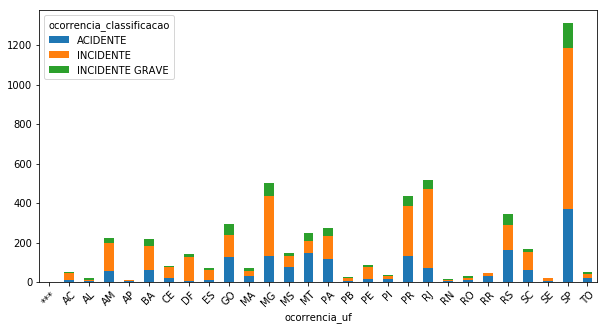

In [11]:
occur_uf_df = df_occurrences.groupby(['ocorrencia_uf', 'ocorrencia_classificacao']).size().unstack()

ax = occur_uf_df.plot.bar(rot = 45, stacked = True)

There values are correct, 27 UF's and only two NULL data. It is hard to say that this feature can help in the prediction, the distribution is equally balanced between all UF's. Let's see the _***_ values:

In [12]:
df_occurrences[(df_occurrences.ocorrencia_uf == '***')]

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
5454,201503065919795,ACIDENTE,OUTROS,OUTROS,OTHR,-22.2036,-47.1967,NÃO IDENTIFICADA,***,BRASIL,****,2015-03-06,21:00:00,NaN,ATIVA,A-034/CENIPA/2015,NÃO,NaN,0,1,NÃO,2019-05-31
5459,201309012098180,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,OUTROS,OTHR,6.7119,-32.9919,ÁGUAS INTERNACIONAIS,***,BRASIL,****,2013-09-02,02:54:00,NaN,FINALIZADA,A-158/CENIPA/2013,SIM,2018-05-10,2,1,NÃO,2019-05-31


These are occurrences that happens out of the country, for example, while flying above the sea.